In [1]:
import numpy as np
from scipy.fft import fft2, fftshift, ifftshift, ifft2
import matplotlib.pyplot as plt
import time 

from gpevortex import GPETimeEv as gpe

In [2]:
g = gpe(L = 50, dist = 3, dim = 2,dtcoef = 0.05,  numImagSteps = 5, numRealSteps = 1, antiV = False )

251.0
261.0
Generating a pair of vortices...
Total Imag Time:  0.13387656211853027


In [3]:
print((g.winL //2 - g.neighborhoodHalfLength)/g.dx)

204.8


In [20]:
print(g.neighborhoodHalfLength)
print(g.winL//2/g.dx - g.neighborhoodHalfLength) # not the same units!! half length is in unit pixels! 
start = g.winL//2/g.dx - g.neighborhoodHalfLength
print(g.npoints//100) # this is neighborhood half-length so the box should be from 20 to 30 assuming index 25 is the halfway point 
print(start + 2*g.neighborhoodHalfLength)
end = start + 2*g.neighborhoodHalfLength

print((start + end)/2)
print(len(g.xi[0][0]))
# 5 pixels vs 5 length units... right now the neighborhood function is outputting in length units not pixels 

5
251.0
5
261.0
256.0
512


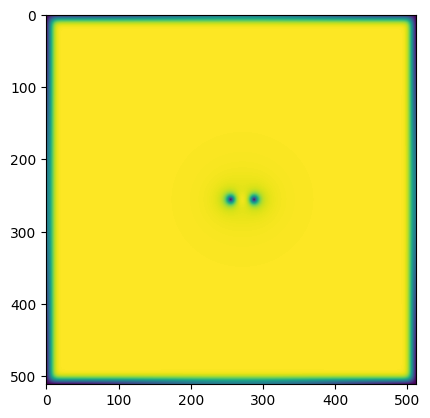

In [31]:
plt.figure() 
plt.imshow(np.abs(g.psi))
plt.show() 

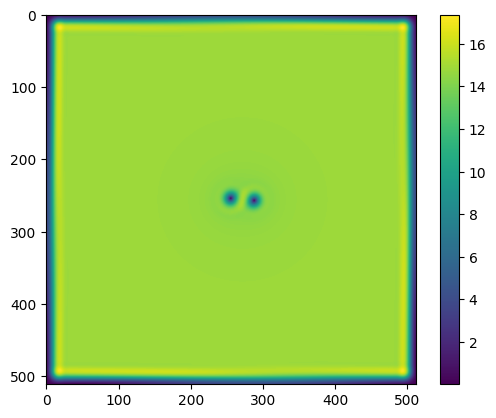

In [32]:
plt.figure()
plt.imshow(np.abs(g.dynpsi))
plt.colorbar() 
plt.show()

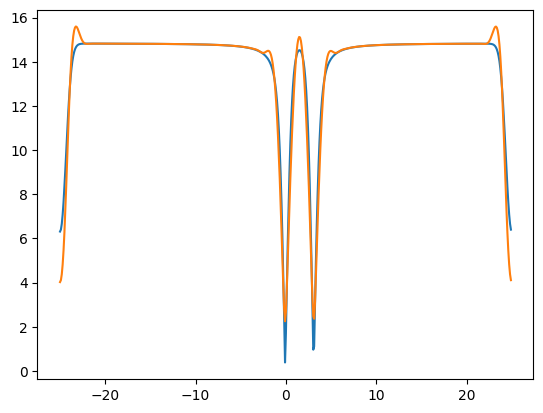

In [33]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.psi[256]))
plt.plot(g.xi[0][0], np.abs(g.dynpsi[256]))
plt.plot()
plt.show() 

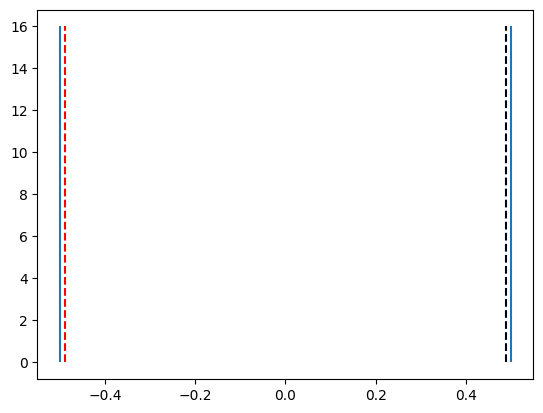

In [8]:
plt.figure() 
plt.vlines(512/100*g.dx, 0, 16)
plt.vlines(-512/100*g.dx, 0, 16)
plt.vlines(g.neighborhoodAxis[0], 0 ,16, linestyle = '--', color = 'red')
plt.vlines(g.neighborhoodAxis[-1], 0 ,16, linestyle = '--', color = 'black')
#plt.plot(g.xi[0][0], np.abs(g.psi[:,256]))
#plt.plot(g.xi[0][0], np.abs(g.dynpsi[:,256]))
plt.plot()
plt.show() 

In [6]:
print(-512//100*g.dx)
print(g.neighborhoodAxis[0])
print(g.neighborhoodAxis[-1])

-0.5859375
-0.48828125
0.48828125


In [7]:
print(g.neighborhoodAxis)

[-24.90234375]


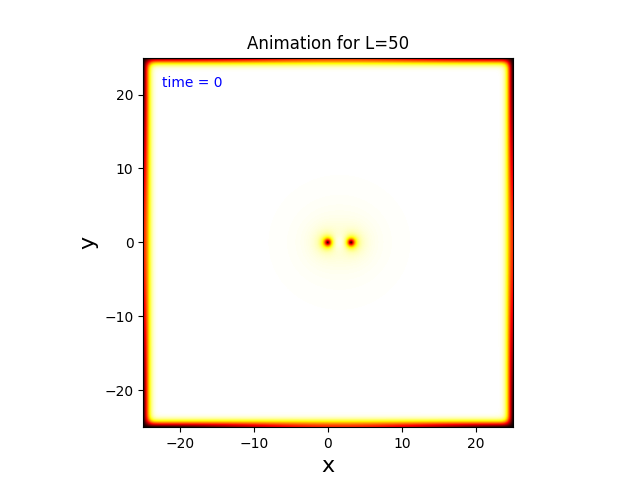

In [39]:
%matplotlib widget
g.animatepsi2d_show() 

In [11]:
psi_test = g.psi

In [14]:
t0 = time.time() 
psi_np = np.fft.fftshift(np.fft.fft2(psi_test))
t1 = time.time() 

psi_sp = fftshift(fft2(psi_test))
t2 = time.time() 

print(t1-t0) 
print(t2-t1) 

0.03913688659667969
0.03303050994873047


In [24]:
t0 = time.time() 
psi_np = np.fft.fftshift(psi_test)
t1 = time.time() 
psi_np = np.fft.fft2(psi_np)
t2 = time.time() 

print(t2-t1)
print(t1-t0)
print(t2 - t0)

0.03403115272521973
0.012002229690551758
0.046033382415771484


In [27]:
t0 = time.time() 
psi_np = np.fft.ifft2(np.fft.ifftshift(psi_test))
t1 = time.time() 

psi_sp = ifft2(ifftshift(psi_test))
t2 = time.time() 

print(t1-t0) 
print(t2-t1)

0.04294443130493164
0.0370335578918457


In [ ]:
plt.figure() 
plt.plot

In [22]:
0.005*2*42000/60

7.0

### Try changing the placement of the fourier shift 

In [1]:
from gpevortex_copy import GPETimeEv as gpe2 
from gpevortex import GPETimeEv as gpe
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g = gpe2(dim = 2, numImagSteps = 500, numRealSteps = 1000)


In [6]:
g_orig = gpe(dim = 2, numImagSteps = 500, numRealSteps = 1000)

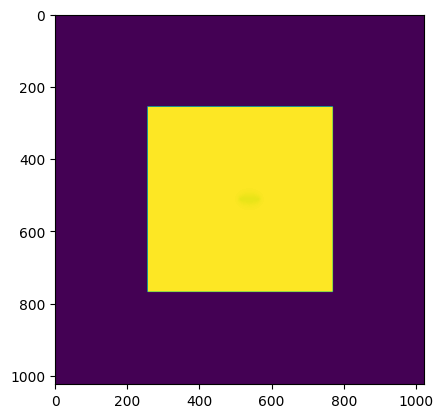

In [3]:
plt.figure() 
plt.imshow(np.abs(g.psi_init)) 
plt.show() 

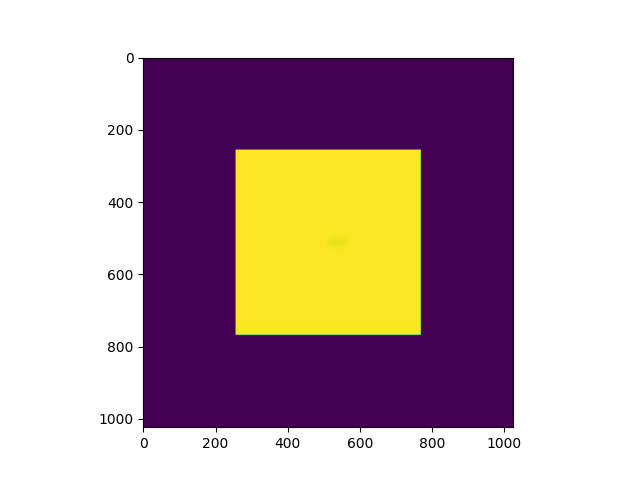

In [7]:
plt.figure() 
plt.imshow(np.abs(g_orig.psi_init))

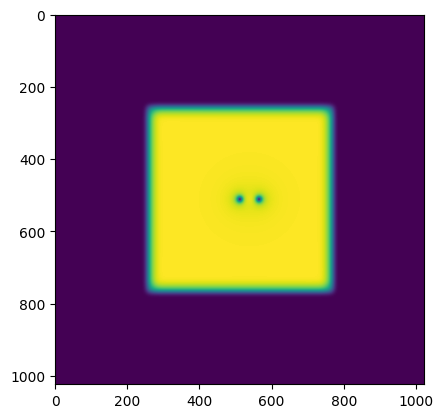

In [4]:
plt.figure() 
plt.imshow(np.abs(g.psi)) 
plt.show()

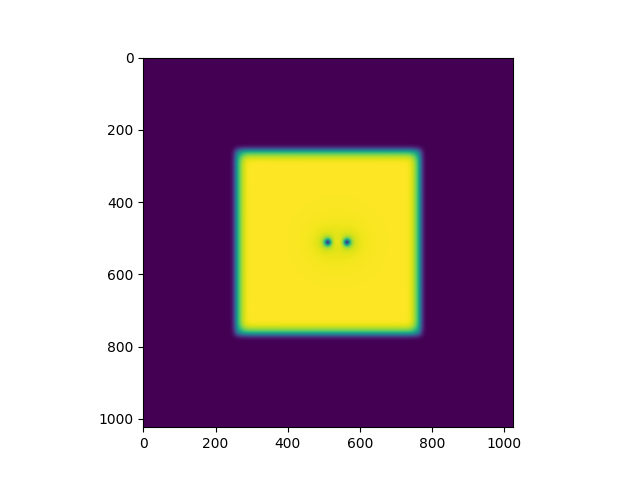

In [8]:
plt.figure() 
plt.imshow(np.abs(g_orig.psi)) 
plt.show()

c:\Users\TQC User\Desktop\BECs\gpevortex_copy.py:413: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate)


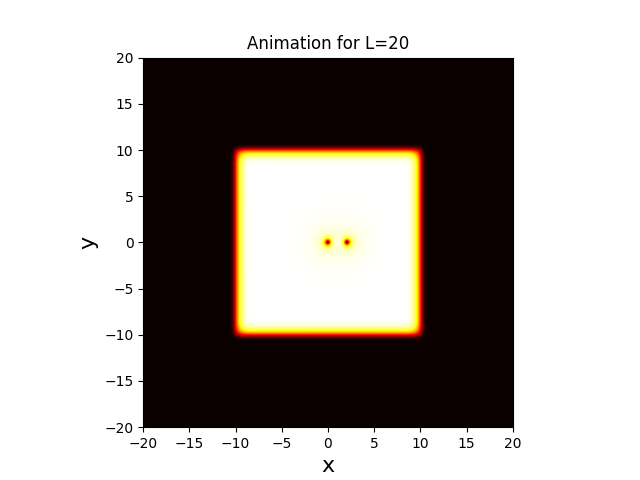

In [9]:
%matplotlib widget

g.animatepsi2d_show() 

c:\Users\TQC User\Desktop\BECs\gpevortex.py:403: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate)


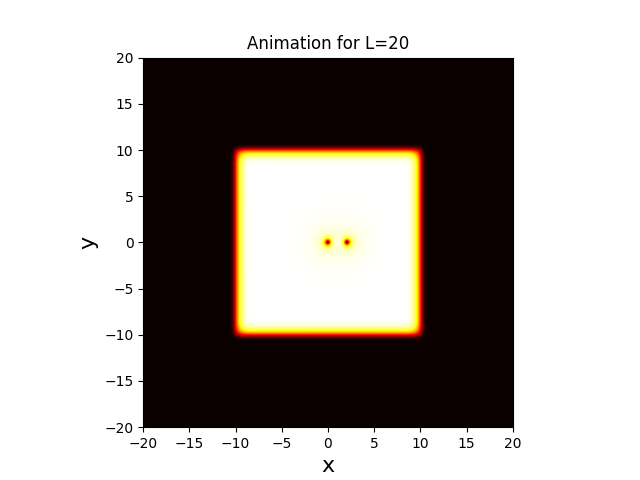

In [10]:
%matplotlib widget

g_orig.animatepsi2d_show() 

### Run the Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gpevortex import GPETimeEv as gpe

In [2]:
g = gpe(dim = 2, L = 50, numImagSteps = 2000, numRealSteps = 0, antiV = False, dist = 3)

Generating a pair of vortices...
Total Imag Time:  273.5903990268707


In [3]:
0.148* 2000/60

4.933333333333334

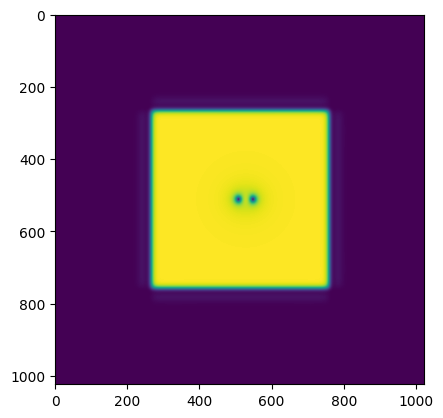

In [3]:
plt.figure() 
plt.imshow(np.abs(g.psi))

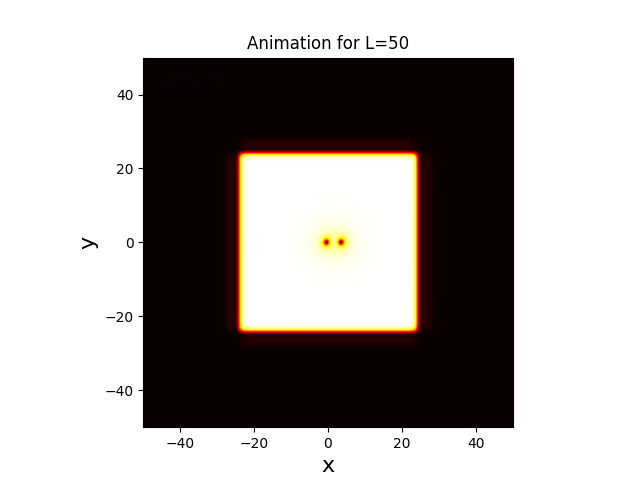

In [6]:
%matplotlib widget
g.animatepsi2d_show() 

In [6]:
print(len(g.snapshots)) 

433


In [1]:
plt.figure() 
plt.imshow(np.abs(g.snapshots[345]), extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2],cmap = plt.cm.hot)
plt.show() 

NameError: name 'plt' is not defined